
# Project: Investigate No Show appointment Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  In this project I choose to explor and analyse the 'No Show' dataset, which is a collection of information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

### Question to investigate:
#### 1) Is there a correlation between patients having a scholarship and whether or not patients show up for their appointment ?
#### 2) Does receiving an SMS influence patients to show up for the appointment ?
#### 3) Does the patient's age affect their ability to show up for the appointment ?
#### 4)Is there a correlation between patients having a diabetes and whether or not patients show up for their appointment ?

In [1]:
# Import necessary packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# Function to Create a bar chart
def create_chart(variable1,variable2,width,labels,xlable,ylabel,title):
    ind = np.arange(len(variable1))  # the x locations for the groups
#width = 0.35       # the width of the bars
# plot bars
    show_bars = plt.bar(ind, variable1,width, color='b', alpha=.7, label='show')
    absent_bars = plt.bar(ind + width, variable2,width, color='r', alpha=.7, label='No show')

# title and labels
    plt.ylabel(ylabel)
    plt.xlabel(xlable)
    plt.title(title)
    locations = ind + width / 2  # xtick locations
#labels = ['didnt received', 'received']  # xtick labels
    plt.xticks(locations, labels)

# legend
    plt.legend();

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# load `noshowappointments.csv` and print out a few lines.
df = pd.read_csv('C:\\Users\\abrar\\Downloads\\noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# check the number of sampls and columns
df.shape

(110527, 14)

In [5]:
# check columns type and missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# check fo null
df.isna().sum().any()

False

In [7]:
# check for duplicates data 
df.duplicated().sum()

0

In [8]:
# look for instances of possibly errant data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


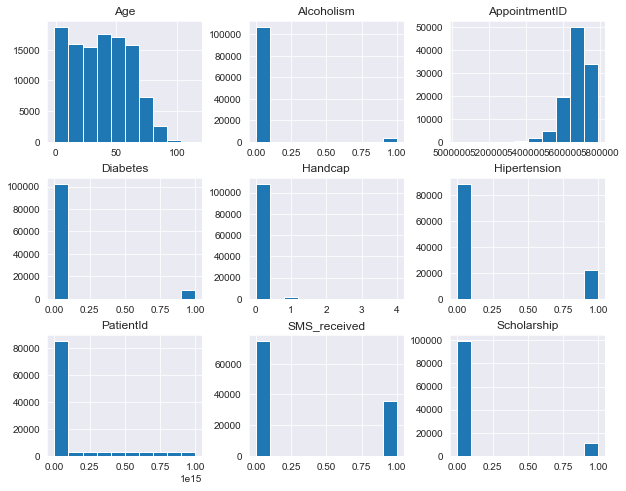

In [9]:
df.hist(figsize=(10,8));



### Data Cleaning 

In [10]:
# Get names of indexes for which column Age has value -1
indexNames = df[ df['Age'] == -1 ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)


In [11]:
# rename No-show column to Miss_appointmrnt 
df.rename(columns={'No-show': 'Miss_appointment'}, inplace=True)

In [12]:
# drop columns 
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Neighbourhood'],axis=1 , inplace= True)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Is there a correlation between patients having a scholarship and whether or not patients show up for their appointment ?)

In [13]:

# get counts for each appointment if patient show up  or not and enrolled in Scholarship or not
appointment_counts = df.groupby(['Miss_appointment','Scholarship']).count()['Age']
appointment_counts

Miss_appointment  Scholarship
No                0              79924
                  1               8283
Yes               0              19741
                  1               2578
Name: Age, dtype: int64

In [14]:
# get total counts for each appointment
appointment_totals = df.groupby(['Scholarship']).count()['Age']
appointment_totals

Scholarship
0    99665
1    10861
Name: Age, dtype: int64

In [15]:
# get proportions of pation who show up for thier appointment by dividing thier appointment counts by total # of appointment
show_proportions =appointment_counts['No'] / appointment_totals
show_proportions

Scholarship
0    0.801926
1    0.762637
Name: Age, dtype: float64

In [16]:
# get proportions of pation who miss thier appointment by dividing thier miss appointment counts by total # of appointment
absent_proportions = appointment_counts['Yes'] / appointment_totals
absent_proportions

Scholarship
0    0.198074
1    0.237363
Name: Age, dtype: float64

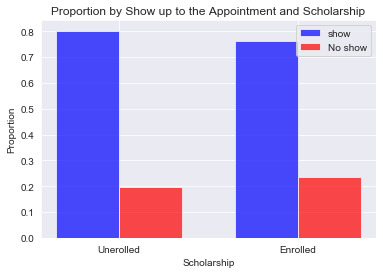

In [17]:
# Create a bar chart with proper labels

# title and labels
xlabel= 'Scholarship'
ylable= 'Proportion'
title= 'Proportion by Show up to the Appointment and Scholarship'
labels = ['Unerolled', 'Enrolled']  # xtick labels

create_chart(show_proportions,absent_proportions,0.35,labels,xlabel,ylable,title)

**Most of the patient who is enrolled in Scholarship show up for thier appointments**

### Research Question 2  (Does receiving an SMS influence patients to show up for the appointment ?)

In [18]:
# get counts for each appointment if patient show up  or not and received SMS or not
appointment_counts = df.groupby(['Miss_appointment','SMS_received']).count()['Gender']
appointment_counts

Miss_appointment  SMS_received
No                0               62509
                  1               25698
Yes               0               12535
                  1                9784
Name: Gender, dtype: int64

In [19]:
# get total counts for whether received SMS or not
appointment_totals = df.groupby(['SMS_received']).count()['Gender']
appointment_totals

SMS_received
0    75044
1    35482
Name: Gender, dtype: int64

In [20]:
# get proportions of pation who show up for thier appointment by dividing thier miss appointment counts by total # of appointment
show_proportions =appointment_counts['No'] / appointment_totals
show_proportions

SMS_received
0    0.832965
1    0.724255
Name: Gender, dtype: float64

In [21]:
# get proportions of pation who miss thier appointment by dividing thier miss appointment counts by total # of appointment
absent_proportions = appointment_counts['Yes'] / appointment_totals
absent_proportions

SMS_received
0    0.167035
1    0.275745
Name: Gender, dtype: float64

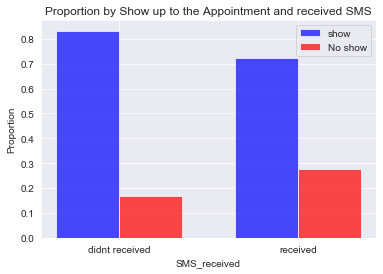

In [22]:
# Create a bar chart with proper labels

# title and labels
xlable ='SMS_received'
ylable= 'Proportion'
title='Proportion by Show up to the Appointment and received SMS'
labels = ['didnt received', 'received']  # xtick labels

create_chart(show_proportions,absent_proportions, 0.35 ,labels,xlable,ylable,title)

**Most of the patients who received an SMS showed up for the appointment.**

### Research Question 3  ( Does the patient's age affect their ability to show up for the appointment ?)

In [23]:
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [24]:
# Bin edges that will be used to "cut" the Age into groups
bin_edges = [ -1, 10,20 ,30 , 40, 50, 60, 70, 80, 90 ,115] 

In [25]:
# Labels for the Age groups
bin_names = [ '0-10', '11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-115'] 

In [26]:
# Creates Age group column
df['Age_group'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Miss_appointment,Age_group
0,F,62,0,1,0,0,0,0,No,61-70
1,M,56,0,0,0,0,0,0,No,51-60
2,F,62,0,0,0,0,0,0,No,61-70
3,F,8,0,0,0,0,0,0,No,0-10
4,F,56,0,1,1,0,0,0,No,51-60


In [27]:
# get the data of whether the patients show up for thier appointments or not 
show = df.query('Miss_appointment in "No"')
absent =df.query('Miss_appointment in "Yes"')

In [28]:
# get the Age of patient who show up for thier appointments or not
show_count= show['Age_group'].value_counts() / df['Age_group'].value_counts()
abcent_count= absent['Age_group'].value_counts()  / df['Age_group'].value_counts()
show_count,abcent_count

(0-10      0.797963
 51-60     0.826256
 31-40     0.785278
 41-50     0.800971
 21-30     0.753755
 11-20     0.747462
 61-70     0.852712
 71-80     0.844608
 81-90     0.840016
 91-115    0.798701
 Name: Age_group, dtype: float64,
 0-10      0.202037
 11-20     0.252538
 21-30     0.246245
 31-40     0.214722
 41-50     0.199029
 51-60     0.173744
 61-70     0.147288
 71-80     0.155392
 81-90     0.159984
 91-115    0.201299
 Name: Age_group, dtype: float64)

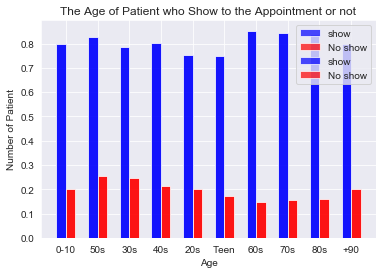

In [29]:
# Create a bar chart with proper labels
ind = np.arange(len(show_count))
width=0.3
show_bars = plt.bar(ind, show_count,width, color='b', alpha=.7, label='show')
absent_bars = plt.bar(ind + width , abcent_count, width,color='r', alpha=.7, label='No show')
# title and labels
ylabel='Number of Patient'
xlabel='Age'
title= 'The Age of Patient who Show to the Appointment or not'
labels = ['0-10', '50s','30s','40s','20s','Teen','60s','70s','80s','+90']  # xtick labels

create_chart(show_count,abcent_count,0.3,labels,xlabel,ylabel,title)

**It look like that the patients Age  does not affect their ability to show up for the appointment as we can see the majority of patient in deffrnt Age show up for thier appointments**

### Research Question 4  (Is there a correlation between patients having a diabetes and whether or not patients show up for their appointment ?)

In [30]:
# get counts for each appointment if patient show up  or not and has Diabetes or not
appointment_counts = df.groupby(['Miss_appointment','Diabetes']).count()['Gender']
appointment_counts

Miss_appointment  Diabetes
No                0           81694
                  1            6513
Yes               0           20889
                  1            1430
Name: Gender, dtype: int64

In [31]:
# get total counts patient has Diabetes or not
appointment_totals = df.groupby(['Diabetes']).count()['Gender']
appointment_totals

Diabetes
0    102583
1      7943
Name: Gender, dtype: int64

In [32]:
# get proportions of pation who show up for thier appointment by dividing thier show up appointment counts by total # of patient
show_proportions =appointment_counts['No'] / appointment_totals
show_proportions

Diabetes
0    0.796370
1    0.819967
Name: Gender, dtype: float64

In [33]:
# get proportions of pation who miss thier appointment by dividing thier miss appointment counts by total # of patient
absent_proportions = appointment_counts['Yes'] / appointment_totals
absent_proportions

Diabetes
0    0.203630
1    0.180033
Name: Gender, dtype: float64

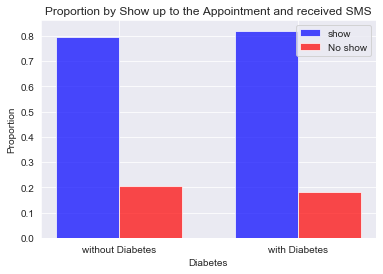

In [34]:
# Create a bar chart with proper labels

# title and labels
xlabel='Diabetes'
ylabel='Proportion'
title= 'Proportion by Show up to the Appointment and received SMS'
labels = ['without Diabetes', 'with Diabetes']  # xtick labels

create_chart(show_proportions,absent_proportions,0.35,labels,xlabel,ylabel,title)

**The majority of patients who have Diabetes show up for thier appointments**

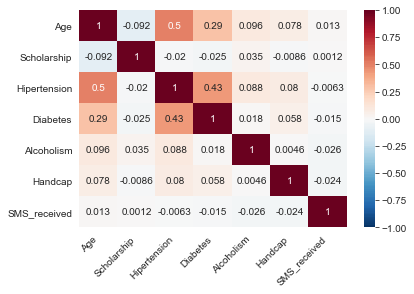

In [35]:
# correlation matrix to show the relationship between variables.

correlation = df.corr()
matrix = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.color_palette("RdBu_r", 200),
    annot=True
)
matrix.set_xticklabels(
    matrix.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**The correlation matrix indicate that there are no relationship between variables except the hipertension and age they have a moderate positive relationship and a low positive relationship between hipertension and diabetes**

<a id='conclusions'></a>
## Conclusions

   > **At the end of this investigation, we will describe in short the analysis steps we performed and answer our initial qustion that we raised at the begining. First, we took a look on the dataset by checking the number of colums and observations we have, we noticed one of the colums 'No-show' raised an error everytime we called it so we simply renamed it to avoid further complications. We also noticed on of the entries had a value of -1 in the 'Age' colume. so we removed it. After we cleaned our data we started exploring it and we found the following insights:**

  > **1. The amount of patients who attended the appointment is larger than the patients who didn't attend.** -->
   
   >**2. The majority of patients who enrolled in scholrship attended their appointment.**
   
   >**3. Most of the patients who received an SMS showed up for the appointment.**
   
   >**4. The Age of the pationts dose not effect thier ability to show up for thier appointments**
   
   >**5. Almost all the patients with diabetes attended their appointment.**
   
   >**6. There are no relationship between variables except the hipertension and age they have a moderate positive relationship and a low positive relationship between hipertension and diabetes.**
   
### Limitations

 > **1. The No-show data is skewed and needed to be scaled.**
 
 > **2. One missing metric that would be helpful here is Appointment type.**
 
 > **3. Most of the variables are independent, which leads to fewer correlation.**